In [42]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#loading datasets
customer_details=pd.read_csv('classified-data.csv')

customer_details.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


# Exploratory Data Analysis

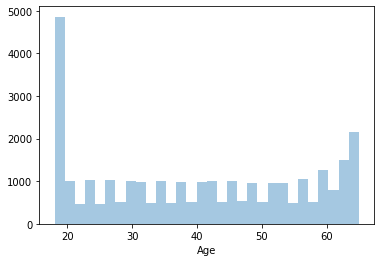

In [3]:
sns.distplot(customer_details['Age'],kde=False,bins=30)

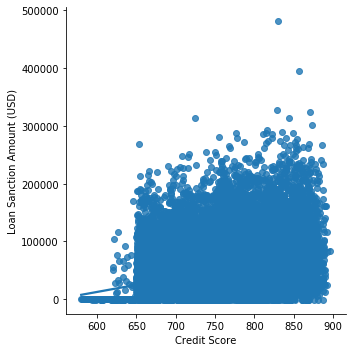

In [4]:
sns.lmplot(x='Credit Score',y='Loan Sanction Amount (USD)',data=customer_details)

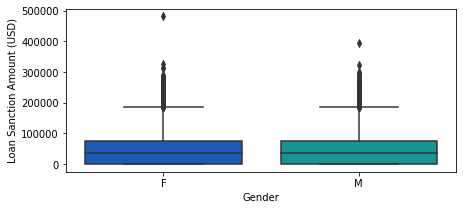

In [5]:
plt.figure(figsize=(7, 3))
sns.boxplot(x='Gender',y='Loan Sanction Amount (USD)',data=customer_details,palette='winter')

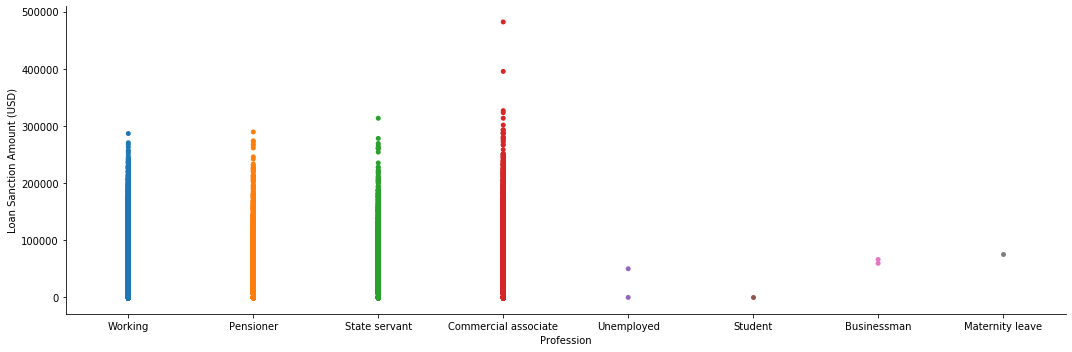

In [6]:
sns.catplot(x="Profession", y="Loan Sanction Amount (USD)", jitter=False,aspect=3,data=customer_details)

<Figure size 432x720 with 0 Axes>

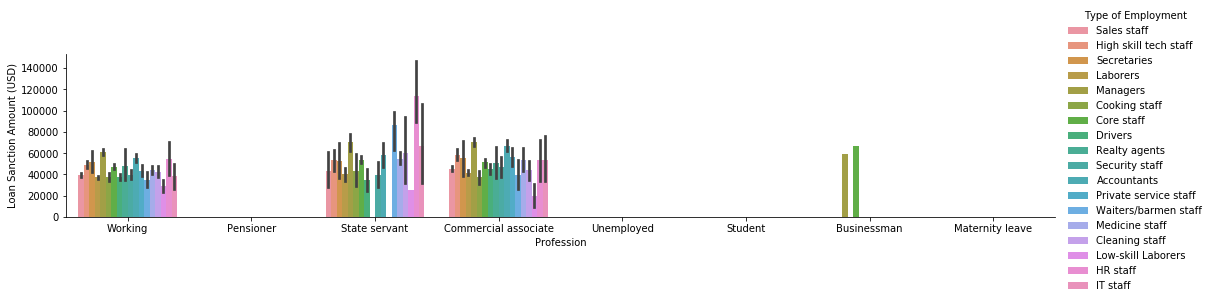

In [7]:
plt.figure(figsize=(6, 10))
sns.catplot(x="Profession",y="Loan Sanction Amount (USD)",hue="Type of Employment",kind="bar",height=3,aspect=5,data=customer_details)

In [8]:
# All the pensoners,unemployed,students,maternity leave have empty values in Type of Employment
# As these type of customers may don't have any employment I have added a new classification called "No Job" in Type of Employment

customer_details.loc[customer_details.Profession == 'Pensioner', 'Type of Employment'] = "No Job"
customer_details.loc[customer_details.Profession == 'Student', 'Type of Employment'] = "No Job"
customer_details.loc[customer_details.Profession == 'Unemployed', 'Type of Employment'] = "No Job"
# Maternity leave considerd as "No Job" as there is only one entry for it
customer_details.loc[customer_details.Profession == 'Maternity leave', 'Type of Employment'] = "No Job"
customer_details['Type of Employment']

0                  Sales staff
1                          NaN
2                       No Job
3                       No Job
4        High skill tech staff
                 ...          
29995                 Managers
29996                 Laborers
29997              Sales staff
29998           Security staff
29999                   No Job
Name: Type of Employment, Length: 30000, dtype: object

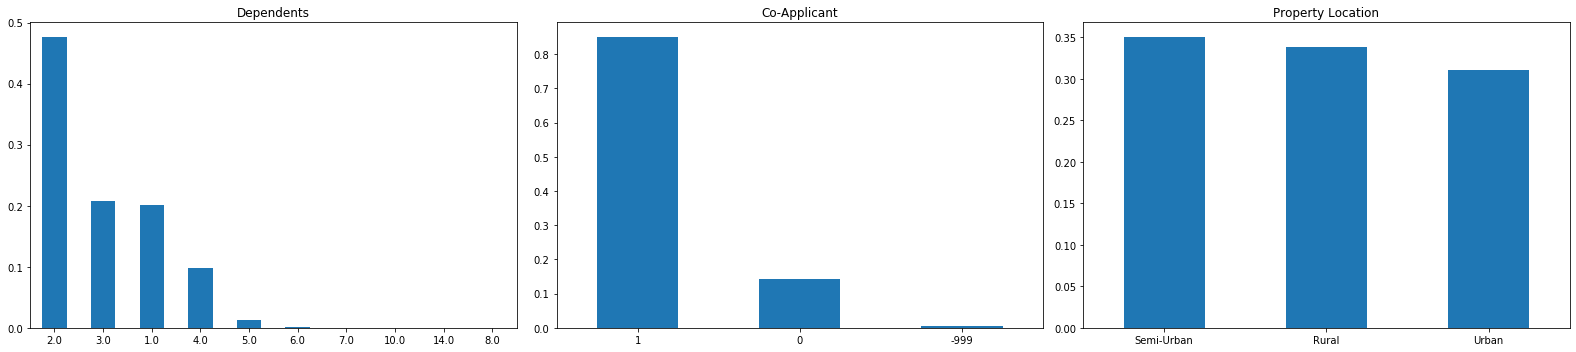

In [9]:
fig2, ax2= plt.subplots(1,3)


customer_details['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

customer_details['Co-Applicant'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Co-Applicant',rot=0)

customer_details['Property Location'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property Location',rot=0)

fig2.tight_layout()

In [10]:
# -999 in Co-Applicant column is an invalid entry .so as it is a negative number I am converting it into 0

customer_details['Co-Applicant'] = customer_details['Co-Applicant'].replace([-999],0)

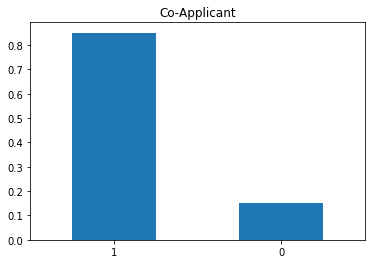

In [11]:
#checking whether values changed or not
customer_details['Co-Applicant'].value_counts(normalize=True).plot(kind='bar',title= 'Co-Applicant',rot=0)

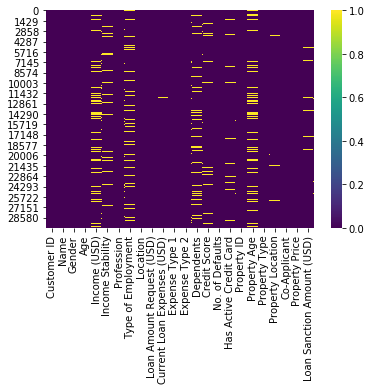

In [12]:
sns.heatmap(customer_details.isnull(),cmap='viridis')

In [13]:
# 'Name','Customer ID','Location','Property ID' is unique for each customer so it can be avoided
# Loan given to each 'Gender' is almost same (And I have Trained including gender.it doesn't give any improvement in accuracy) 
cus_det=customer_details.drop(['Name','Customer ID','Gender','Location','Property ID'],axis='columns')

In [14]:
#Finding the null values in the dataset
cus_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
Age                            30000 non-null int64
Income (USD)                   25424 non-null float64
Income Stability               28317 non-null object
Profession                     30000 non-null object
Type of Employment             25474 non-null object
Loan Amount Request (USD)      30000 non-null float64
Current Loan Expenses (USD)    29828 non-null float64
Expense Type 1                 30000 non-null object
Expense Type 2                 30000 non-null object
Dependents                     27507 non-null float64
Credit Score                   28297 non-null float64
No. of Defaults                30000 non-null int64
Has Active Credit Card         28434 non-null object
Property Age                   25150 non-null float64
Property Type                  30000 non-null int64
Property Location              29644 non-null object
Co-Applicant                   30000 non

# Outlier Analysis

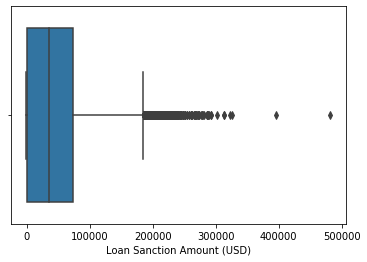

In [15]:
#before removing outliers
sns.boxplot(cus_det['Loan Sanction Amount (USD)'])

In [16]:
# Inter Quartile Range (IQR) method
Q1 = cus_det.quantile(0.25)
Q3 =cus_det.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                30.0000
Income (USD)                     1440.1350
Loan Amount Request (USD)       78786.8500
Current Loan Expenses (USD)       273.6250
Dependents                          1.0000
Credit Score                      117.2400
No. of Defaults                     0.0000
Property Age                     1440.9575
Property Type                       2.0000
Co-Applicant                        0.0000
Property Price                 118308.5600
Loan Sanction Amount (USD)      74261.2500
dtype: float64


In [17]:
cus_det = cus_det[~((cus_det < (Q1 - 1.5 * IQR)) |(cus_det > (Q3 + 1.5 * IQR))).any(axis=1)]

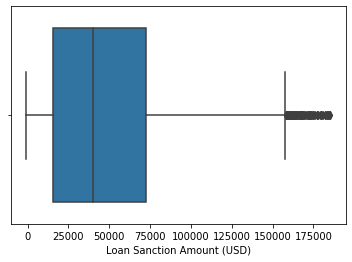

In [18]:
sns.boxplot(cus_det['Loan Sanction Amount (USD)'])
#after removing outliers

In [19]:
cus_det.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18438 entries, 0 to 29999
Data columns (total 19 columns):
Age                            18438 non-null int64
Income (USD)                   15360 non-null float64
Income Stability               17316 non-null object
Profession                     18438 non-null object
Type of Employment             15447 non-null object
Loan Amount Request (USD)      18438 non-null float64
Current Loan Expenses (USD)    18322 non-null float64
Expense Type 1                 18438 non-null object
Expense Type 2                 18438 non-null object
Dependents                     16813 non-null float64
Credit Score                   17314 non-null float64
No. of Defaults                18438 non-null int64
Has Active Credit Card         17581 non-null object
Property Age                   15191 non-null float64
Property Type                  18438 non-null int64
Property Location              18209 non-null object
Co-Applicant                   18438 non

# Filling Missing Values

In [20]:
cus_det.isnull().sum()

Age                               0
Income (USD)                   3078
Income Stability               1122
Profession                        0
Type of Employment             2991
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     116
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1625
Credit Score                   1124
No. of Defaults                   0
Has Active Credit Card          857
Property Age                   3247
Property Type                     0
Property Location               229
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      234
dtype: int64

In [21]:
#Property age and current loan expenses is something which cannot be predicted with the given data.so,it is better to find the median of it

cus_det['Property Age']=cus_det['Property Age'].replace(np.NaN,cus_det['Property Age'].median())

cus_det['Current Loan Expenses (USD)']=cus_det['Current Loan Expenses (USD)'].replace(np.NaN,cus_det['Current Loan Expenses (USD)'].median())
cus_det['Credit Score']=cus_det['Credit Score'].replace(np.NaN,cus_det['Credit Score'].median())

#Looking at the dataset I found that Last observation carried forward (LOCF) method is suitable for "Income Stability","Property Location" and "Has active credit card"

cus_det["Income Stability"] = cus_det["Income Stability"].fillna(method='ffill')

cus_det['Property Location']=cus_det['Property Location'].fillna(method='ffill')

cus_det["Has Active Credit Card"] = cus_det["Has Active Credit Card"].fillna(method='ffill')

# Filling with mode
cus_det['Dependents'].fillna(cus_det['Dependents'].mode()[0], inplace=True)

cus_det['Type of Employment'] = cus_det['Type of Employment'].fillna("Unknown")
cus_det.isnull().sum()

Age                               0
Income (USD)                   3078
Income Stability                  0
Profession                        0
Type of Employment                0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            1
Property Age                      0
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      234
dtype: int64

In [22]:
# Income is calculated using SimpleImputer
from sklearn.impute import SimpleImputer
# for skewed distribution median is the better representation
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(cus_det[['Income (USD)']])
cus_det['Income (USD)'] = imr.transform(cus_det[['Income (USD)']]).ravel()

In [23]:
# As there is only few entries in 'Loan Sanction Amount (USD)' it can be avoided
# Trying to predict 'Loan Sanction Amount (USD)' affecting my accuracy
cus_det.dropna(subset=['Loan Sanction Amount (USD)'],inplace=True)
cus_det['Has Active Credit Card'] = cus_det['Has Active Credit Card'].fillna(cus_det['Has Active Credit Card'].value_counts().index[0])

cus_det.isnull().sum()

Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [24]:
cus_det.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18204 entries, 0 to 29999
Data columns (total 19 columns):
Age                            18204 non-null int64
Income (USD)                   18204 non-null float64
Income Stability               18204 non-null object
Profession                     18204 non-null object
Type of Employment             18204 non-null object
Loan Amount Request (USD)      18204 non-null float64
Current Loan Expenses (USD)    18204 non-null float64
Expense Type 1                 18204 non-null object
Expense Type 2                 18204 non-null object
Dependents                     18204 non-null float64
Credit Score                   18204 non-null float64
No. of Defaults                18204 non-null int64
Has Active Credit Card         18204 non-null object
Property Age                   18204 non-null float64
Property Type                  18204 non-null int64
Property Location              18204 non-null object
Co-Applicant                   18204 non

# Label Encoding

In [25]:
# Researches proven that One hot encoding is always outperform label encoding
# But in this dataset it does't make a big change (I have tried that)
cus_det["Expense Type 1"] = cus_det["Expense Type 1"].astype('category')# converting into type category
cus_det["Expense Type 2"] = cus_det["Expense Type 2"].astype('category')

cus_det["Income Stability"] = cus_det["Income Stability"].astype('category')

cus_det["Type of Employment"] = cus_det["Type of Employment"].astype('category')


In [26]:
# Assigning codes
cus_det["Expense Type 1"] = cus_det["Expense Type 1"].cat.codes
cus_det["Expense Type 2"] = cus_det["Expense Type 2"].cat.codes

cus_det["Income Stability"] = cus_det["Income Stability"].cat.codes

cus_det["Type of Employment"] = cus_det["Type of Employment"].cat.codes




In [27]:
cus_det.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.05,1,Working,15,72809.58,241.08,0,0,3.0,809.44,0,Active,1933.05,4,Rural,1,119933.46,54607.18
1,32,4952.91,1,Working,18,46837.47,495.81,0,1,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
6,43,2361.56,1,Working,8,152561.34,697.67,1,1,2.0,637.29,0,Unpossessed,2361.56,1,Semi-Urban,1,221050.80,0.00
9,18,1546.17,1,Working,8,42091.29,500.20,0,0,2.0,613.24,0,Unpossessed,1546.17,2,Urban,1,67993.43,0.00
10,18,2416.86,1,State servant,3,25765.72,140.02,0,1,1.0,652.41,0,Active,2416.86,2,Rural,1,32423.71,16747.72


# One Hot Encoding

In [28]:
cus_det = pd.get_dummies(cus_det,columns=['Property Location','Profession','Has Active Credit Card'])

In [29]:
cus_det.head()

,Age,Income (USD),Income Stability,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,...,Property Location_Semi-Urban,Property Location_Urban,Profession_Businessman,Profession_Commercial associate,Profession_Pensioner,Profession_State servant,Profession_Working,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed
0,56,1933.05,1,15,72809.58,241.08,0,0,3.0,809.44,...,0,0,0,0,0,0,1,1,0,0
1,32,4952.91,1,18,46837.47,495.81,0,1,1.0,780.40,...,0,0,0,0,0,0,1,0,0,1
6,43,2361.56,1,8,152561.34,697.67,1,1,2.0,637.29,...,1,0,0,0,0,0,1,0,0,1
9,18,1546.17,1,8,42091.29,500.20,0,0,2.0,613.24,...,0,1,0,0,0,0,1,0,0,1
10,18,2416.86,1,3,25765.72,140.02,0,1,1.0,652.41,...,0,0,0,0,0,1,0,1,0,0


In [30]:
cus_det.isnull().sum()

Age                                   0
Income (USD)                          0
Income Stability                      0
Type of Employment                    0
Loan Amount Request (USD)             0
Current Loan Expenses (USD)           0
Expense Type 1                        0
Expense Type 2                        0
Dependents                            0
Credit Score                          0
No. of Defaults                       0
Property Age                          0
Property Type                         0
Co-Applicant                          0
Property Price                        0
Loan Sanction Amount (USD)            0
Property Location_Rural               0
Property Location_Semi-Urban          0
Property Location_Urban               0
Profession_Businessman                0
Profession_Commercial associate       0
Profession_Pensioner                  0
Profession_State servant              0
Profession_Working                    0
Has Active Credit Card_Active         0


# Splitting Data

In [31]:
# machine learning algorithms that are  using here sensitive to feature scaling 
from sklearn.model_selection import train_test_split

x = cus_det.drop('Loan Sanction Amount (USD)',axis=1)
y = cus_det['Loan Sanction Amount (USD)']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101)

# Model : RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter tuning is done using validation cure.As it takes a lot of time to execute I have avoided that part
regr = RandomForestRegressor(max_depth=6)
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
test_data_prediction = regr.predict(X_test)


In [34]:
from sklearn import metrics
RFR2score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error of RandomForestRegressor : ", RFR2score)

R squared error of RandomForestRegressor :  0.8003704530179442


# Model : Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.21645709e+01  5.58280100e-01  1.11392043e+03  1.19608464e+01
  6.25243245e-01 -3.07495484e+00  3.42143500e+02  9.30567985e+02
  3.18472949e+02  1.49160877e+02 -3.51519702e-10 -1.20688997e+00
 -7.39783576e+00 -2.83080226e-10 -1.47159721e-02  1.24339217e+02
 -3.53355910e+02  2.29016694e+02  8.08281588e+03 -3.84551997e+02
 -5.40173918e+03 -1.31124517e+03 -9.85279531e+02 -2.89969835e+02
  3.11983073e+02 -2.20132377e+01]


In [36]:
predictions = lm.predict( X_test)
print("R squared error of LinearRegression : ",metrics.r2_score(y_test, predictions))

R squared error of LinearRegression :  0.6986815386156477


# Model : BayesianRidge

In [37]:
from sklearn import linear_model
bm=linear_model.BayesianRidge(n_iter=300)
bm.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [38]:
bm_prediction=bm.predict(X_test)
print("R squared error of BayesianRidge : ",metrics.r2_score(y_test, bm_prediction))

R squared error of BayesianRidge :  0.6982766453355826


# Model : DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=101,max_depth=6.5,min_samples_split=2)   
    #fit the data
dmodel = dtr.fit(X_train, y_train)
dprediction=dmodel.predict(X_test)
print("R squared error of DecisionTreeRegressor : ",metrics.r2_score(y_test, dprediction))    


R squared error of DecisionTreeRegressor :  0.7915982648725829


In [40]:
# The Model with Higher R squared error is RandomForestRegressor .so it is the best Model For the given data